### Exercise H3.2: MLP Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import random
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
rdata = np.loadtxt(r"C:\Users\lcube\Desktop\jupyter\BCCN\MI\given\RegressionData.txt") #load the given regression data
#print(rdata)

In [7]:
## A) Initialization:

N1 = 3 #number of hidden nodes

x = rdata[:,0]
y = rdata[:,1]

#x = np.linspace(1,len(x),len(x)) #alternative input

b10 = random.uniform(-0.5,0.5) #input bias
w10 = [random.uniform(-0.5,0.5) for _ in range(N1)] #input weight

def hidden(x): #hidden layer

    return (np.tanh((np.dot(w10,x)) - b10))

b21 = random.uniform(-0.5,0.5) #output bias
w21 = [random.uniform(-0.5,0.5) for _ in range(N1)] #input weight
    
def output(hid): #output layer
    
    return((np.dot(w21,hid)) - b21)


0.8545


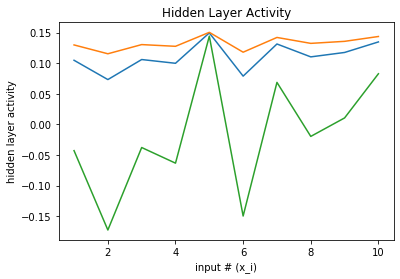

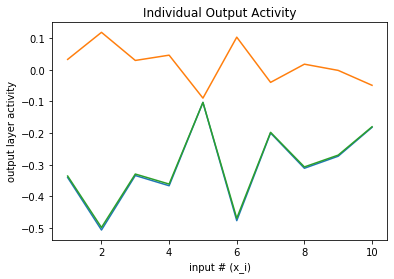

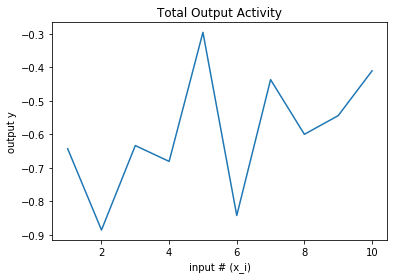

In [4]:
## B) Iterative learning:

# 1. Forward & Back Propagation

# a) Forward Propagation

z = np.linspace(1,len(x),len(x))

hid = [hidden(x[i]) for i in range(len(x))] #hidden layer for each input x
hid = np.array(hid)
#print(hid)

#plot the activity of the hidden layer
plt.plot(z,hid)
plt.title('Hidden Layer Activity')
plt.xlabel('input # (x_i)')
plt.ylabel('hidden layer activity')
plt.show()

out = [output(x[i]) for i in range(len(x))]
out = np.array(out) #connect each hidden layer neuron to the output
#print(out)

#plot the activity of the output layer
plt.plot(z,out)
plt.title('Individual Output Activity')
plt.xlabel('input # (x_i)')
plt.ylabel('output layer activity')
plt.show()

yout = [(out[i][0] + out[i][1] + out[i][2]) for i in range(len(x))] #sum each of the output's activity
#print(yout)

#plot the activity of the total output y
plt.plot(z,yout)
plt.title('Total Output Activity')
plt.xlabel('input # (x_i)')
plt.ylabel('output y')
plt.show()


In [5]:
# b) Output error

def output_error(yout):
    
    qe = 0.5 * (y - yout) ** 2 #quadratic error cost function
    qe = np.sum(qe) #sum over each input to return a single value
    return qe

qe = output_error(yout)
print('output error:', qe)


output error: 3.6298187110784124


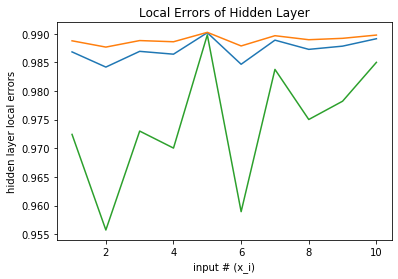

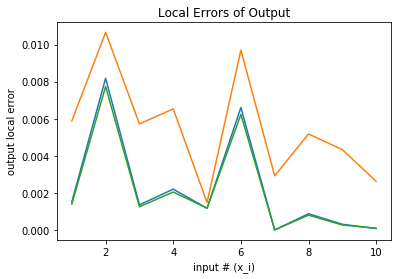

In [6]:
# c) Backpropagation

def derhidden(hid,w10): #hidden layer derivative

    return (1 / (np.cosh(w10 * hid - b10) ** 2))

def deroutput(out,w21): #output layer derivative
    
    return((0.5 * (w21 * out - b21) ** 2))

def le_hidden(): #local error hidden
    
    for j in range(N1):
        
        derhid = [derhidden(hid[i],w10[j]) for i in range(len(x))]
        derhid = np.array(derhid)

    return derhid

le_hid = np.array(le_hidden())

def le_output(): #local error output
    
    for j in range(N1):
        
        derout = [deroutput(out[i],w21[j]) for i in range(len(x))]
        derout = np.array(derout)
    
    return derout

le_out = np.array(le_output())

#print(x,w10)
#print(hid,w21)

#print('local error hidden',le_hid)
#print('local error output',le_out)

#plot the local errors of the hidden layer
plt.plot(z,le_hid) 
plt.title('Local Errors of Hidden Layer')
plt.xlabel('input # (x_i)')
plt.ylabel('hidden layer local errors')
plt.show()

#plot the local error of the output
plt.plot(z,le_out) 
plt.title('Local Errors of Output')
plt.xlabel('input # (x_i)')
plt.ylabel('output local error')
plt.show()


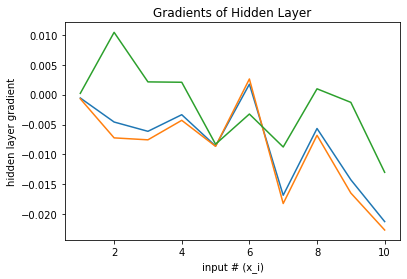

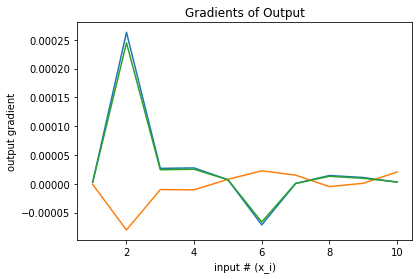

In [7]:
# d) Gradient

#to find the gradient, it will be the 'factor depending on the cost function' -> (y_calculated - y_actual)
#multiplied by the 'factor depending on the model class' -> (local error at neuron * activity of neuron)
#summed over and then divided by 'p'

p = 10 #size of given training set

#print(np.size(yout - y))
#print(np.size(le_hid * hid) / p)

def grad():
    
    grad_hid = [((yout - y) * (le_hid[:,i] * hid[:,i]) / p) for i in range(N1)] #gradient of hidden, w10
    grad_out = [((yout - y) * (le_out[:,i] * out[:,i]) / p) for i in range(N1)] #gradient of output, w21
    
    return grad_hid,grad_out

grad = grad()
grad_hid = np.array(grad[0])
grad_out = np.array(grad[1])


#print('hidden layer gradients:', grad_hid)
#print('output gradients:', grad_out)

#plot the gradients of the hidden layer
[plt.plot(z,grad_hid[i]) for i in range(N1)] 
plt.title('Gradients of Hidden Layer')
plt.xlabel('input # (x_i)')
plt.ylabel('hidden layer gradient')
plt.show()

#plot the gradients of the output
[plt.plot(z,grad_out[i]) for i in range(N1)] 
plt.title('Gradients of Output')
plt.xlabel('input # (x_i)')
plt.ylabel('output gradient')
plt.show()


In [8]:
# 2. Batch Gradient

def bgrad():

    bgrad_hid = [(-1) * np.sum(grad_hid[i]) for i in range(N1)] #batch gradient of hidden, w10 
    bgrad_out = [(-1) * np.sum(grad_out[i]) for i in range(N1)] #batch gradient of output, w21
    
    return bgrad_hid, bgrad_out
    
bgrad = bgrad()
bgrad_hid = bgrad[0]
bgrad_out = bgrad[1]
    
print('hidden layer batch gradients:', bgrad_hid)
print('output batch gradients:', bgrad_out)


hidden layer batch gradients: [0.07955460121654129, 0.09005743558900164, 0.018713677602252794]
output batch gradients: [-0.0002852241726237771, 3.9104401091397566e-05, -0.0002647729747576001]


In [9]:
# 3. Weight Update

#update the weights according to -> w(t+1) = w(t) + eta * bgrad

eta = 0.5 #learning rate

#training error ->

def training_error(qe):
    
    traine = (qe / p) #output error divided by p
    
    return traine

#print(training_error(qe))

def weight_update(w10,w21):
    
    w10 = w10 + (np.dot(eta,bgrad_hid))
    w21 = w21 + (np.dot(eta,bgrad_out))
    
    return w10, w21

wup = weight_update(w10,w21)

w10 = wup[0]
w21 = wup[1]

print('example updated hidden weights:', w10)
print('example updated output weights:', w21)


example updated hidden weights: [-0.04601533  0.00543744 -0.34538609]
example updated output weights: [-0.44758899  0.23076431 -0.43886669]


In [10]:
# C) Stopping Criterion

ssv = 10 ** -5 #some small value

tmax = 5000

te0 = [] #empty array for later error plotting

b10 = [random.uniform(-0.5,0.5) for _ in range(N1)] #input bias
b21 = [random.uniform(-0.5,0.5) for _ in range(N1)] #input bias   

def mlp_reg(): #mlp regression
    
    count = 0
    
    w10 = [random.uniform(-0.5,0.5) for _ in range(N1)] 
    w21 = [random.uniform(-0.5,0.5) for _ in range(N1)]
    print('original w10:', w10)
    print('original w21:', w21)
    
    hid = [hidden(x[i]) for i in range(len(x))]
    out = [output(x[i]) for i in range(len(x))]
    yout = [(out[i][0] + out[i][1] + out[i][2]) for i in range(len(x))]
        
    qe = np.sum(0.5 * (y - yout) ** 2) #output error
    old_te = 0 #old training error
    new_te = (qe / p) #new training error
    dte = (new_te - old_te) #change in training error

    while (abs(dte) / new_te) > ssv: 
    
        count += 1
        
        for j in range(N1):
            derhid = [derhidden(hid[i],w10[j]) for i in range(len(x))]
            derhid = np.array(derhid)
            
        for j in range(N1):
            derout = [deroutput(out[i],w21[j]) for i in range(len(x))]
            derout = np.array(derout)

        le_hid = np.array(le_hidden())
        le_out = np.array(le_output())
        
        grad_hid = [((yout - y) * (np.dot(le_hid[:][i], hid[:][i])) / p) for i in range(N1)] #gradient of hidden, w10
        grad_out = [((yout - y) * (np.dot(le_out[:][i], out[:][i])) / p) for i in range(N1)] #gradient of output, w21
        
        bgrad_hid = [(-1) * np.sum(grad_hid[i]) for i in range(N1)] #batch gradient of hidden, w10 
        bgrad_out = [(-1) * np.sum(grad_out[i]) for i in range(N1)] #batch gradient of output, w21
        
        w10 = w10 + (np.dot(eta,bgrad_hid))
        w21 = w21 + (np.dot(eta,bgrad_out))
        
        #print(count, 'w10',w10)
        #print(count, 'w21',w21)
        
        hid = [np.tanh((np.dot(w10,x[i])) - b10) for i in range(len(x))]
        out = [(np.dot(w21,hid[i])) - b21 for i in range(len(x))]
        yout = [(out[i][0] + out[i][1] + out[i][2]) for i in range(len(x))]
        
        if count == 1:
            new_te = 0
 
        qe = np.sum(0.5 * (y - yout) ** 2) #output error
        old_te = new_te #old training error
        new_te = (qe / p) #new training error
        dte = (new_te - old_te) #change in training error
        
        #print(count,new_te)
        te0.append(new_te) #creating an array to plot the error

        #print(count,'while param.', abs(dte) / new_te)
        
        if (abs(dte) / new_te) < ssv:
            
            print('change in training error divided by training error is less than', ssv)
            return w10, w21
        
        elif count == tmax:
        
            print('maximum iteration number of', tmax, 'has been reached')
            return w10, w21
               
        
mlp = mlp_reg()
w10 = mlp[0]
w21 = mlp[1]

print('final w10:', w10)
print('final w21:', w21)


original w10: [0.2959252032223374, -0.11951379354777891, -0.30648886409332277]
original w21: [-0.40833002027678467, -0.05952965175159641, 0.16485288651534924]
change in training error divided by training error is less than 1e-05
final w10: [-0.35953926 -1.15105721 -0.94581823]
final w21: [-0.43147436 -0.09626956  0.14210527]


### Deliverables:

#### (a) Plot the error ET over the iterations

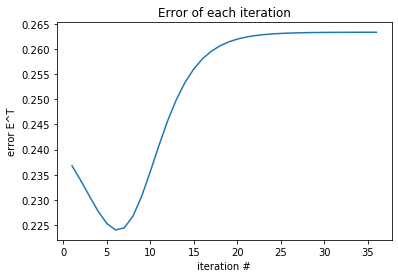

In [11]:
z = np.linspace(1,len(te0),len(te0))
plt.plot(z,te0)
plt.title('Error of each iteration')
plt.xlabel('iteration #')
plt.ylabel('error E^T')
plt.show()

#### (b) For the final network, plot the output of hidden units for all inputs

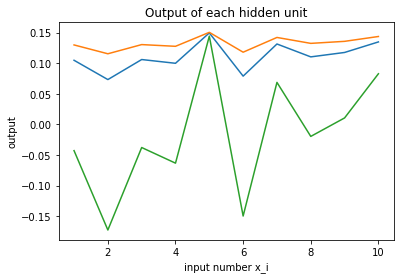

In [12]:
z = np.linspace(1,len(x),len(x))
[plt.plot(z,hid[:,i]) for i in range(N1)] #plotting the hidden unit outputs
plt.title('Output of each hidden unit')
plt.xlabel('input number x_i')
plt.ylabel('output')
plt.show()

#### (c) Plot the output values over the input space (i.e. the input-output function of the network) 
#### together with the training dataset.

[0.5503 0.9206 0.5359 0.6081 0.0202 0.8545 0.2357 0.4847 0.3996 0.1957]
[-0.6427964847596991, -0.8855044071818048, -0.6333582074632413, -0.6806806811302033, -0.2953499017838463, -0.84218009264737, -0.43659634326903074, -0.5997998881869469, -0.5440222911085747, -0.41037890633442575]


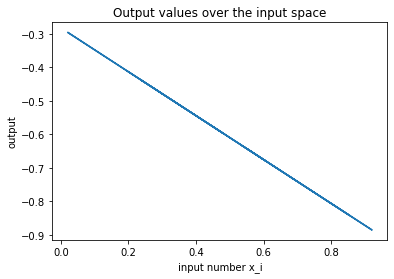

In [20]:
z = np.linspace(1,len(x),len(x))
print(x)
print(yout)
plt.plot(x,yout) #plotting the calculated output y
#plt.plot(x,y) #plotting the training set output y
plt.title('Output values over the input space')
plt.xlabel('input number x_i')
plt.ylabel('output')
plt.show()

#### (d) Plot (a)–(c) twice (i.e., for different initial conditions) next to each other and discuss: is there a difference, and if so, why?

In [14]:
#initial conditions #1
mlp = mlp_reg()
w10_1 = mlp[0]
w21_1 = mlp[1]

print('final w10_1:', w10_1)
print('final w21_1:', w21_1)

hid_1 = [np.tanh((np.dot(w10_1,x[i])) - b10) for i in range(len(x))]
out_1 = [((np.dot(w21_1,hid_1[i])) - b21) for i in range(len(x))]
yout_1 = [(out_1[i][0] + out_1[i][1] + out_1[i][2]) for i in range(len(x))]


original w10: [-0.14906836158263137, -0.47479245333903675, 0.249354024573045]
original w21: [0.3725603408493824, 0.437202416006799, 0.08144656582559151]
change in training error divided by training error is less than 1e-05
final w10_1: [-19.51054434 -20.8630655  -19.04592317]
final w21_1: [ 0.07188951  0.13882035 -0.21883578]


In [15]:
#initial conditions #2
mlp = mlp_reg()
w10_2 = mlp[0]
w21_2 = mlp[1]

print('final w10_2:', w10_2)
print('final w21_2:', w21_2)

hid_2 = [np.tanh((np.dot(w10_2,x[i])) - b10) for i in range(len(x))]
out_2 = [((np.dot(w21_2,hid_2[i])) - b21) for i in range(len(x))]
yout_2 = [(out_2[i][0] + out_2[i][1] + out_2[i][2]) for i in range(len(x))]


original w10: [-0.04461854430454515, 0.2553959393625469, -0.115331427347933]
original w21: [0.40959733930863085, -0.11400019733012412, -0.38685172702175663]
change in training error divided by training error is less than 1e-05
final w10_2: [-0.13472644  0.35228467 -0.21715173]
final w21_2: [ 0.68215853  0.17475711 -0.11505016]


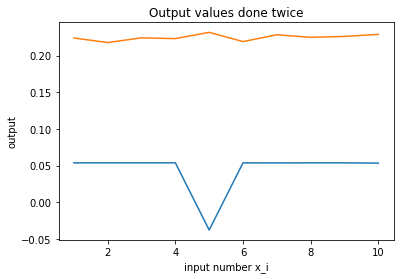

In [16]:
#plotting the two cases
z = np.linspace(1,len(x),len(x))
plt.plot(z,yout_1) #plotting the calculated output y
plt.plot(z,yout_2) #plotting the training set output y
plt.title('Output values done twice')
plt.xlabel('input number x_i')
plt.ylabel('output')
plt.show()

Yes there is a difference between the cases with two different initial conditions. However, depending upon which pairs of starting parameters are obtained, many times the two output values are quite close. 
The variation in amount of difference could be due to the ending weights being decided upon soley the error calculations and not comparing the output value of the network to the training set directly so to speak. This leads to a possibility of large differences between the trained and training sets.

#### (e) What might have been the motivation for using a quadratic error function here?

Possible motivations for using the quadratic error function here are that:

1) The quadratic function always outputs a positive value

2) The function punishes more severely a large difference between the values due to the square